# Data Preprocessing

## Importing libraries

In [5]:
pip install  imblearn

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     -------------------------- ----------- 41.0/59.0 kB 495.5 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.0 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 59.0/59.0 kB 447.1 kB/s eta 0:00:00
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 469.7 kB/s eta 0:00:01
   ------------ ------------------

In [4]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.1/124.9 MB 652.2 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 652.2 kB/s eta 0:03:12
   ---------------------------------------- 0.1/124.9 MB 450.6 kB/s eta 0:04:37
   ---------------------------------------- 0.2/124.9 MB 551.6 kB/s eta 0:03:47
   ---------------------------------------- 0.2/124.9 MB 654.9 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 680.9 kB/s eta 0:03:04
   ---------------------------------------- 0.3/124.9 MB 680.9 kB/s eta 0:03:04
   ---------------------------------------- 0.3/124.9 MB 570.1 kB/s eta 0:03:39
   ---------------------------------------- 0.3/124.9 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
adult-census-income-prediction-ml-project 0.0.1 requires lightgbm, which is not installed.


In [5]:
pip install lightgbm

  Using cached lightgbm-4.4.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.4.0-py3-none-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder

#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#training data 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb 
import lightgbm as ltb

#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Loading modified data

In [3]:
df_adult=pd.read_csv('D:/Adult Census Prediction/Notebook/data/adult_mod.csv')

In [4]:
df_adult.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1.Data Preprocessing 

## 1.1 Grouping and encoding categorical column

In [5]:
for dataset in [df_adult]:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 0
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 1
    dataset.loc[dataset['race'] != ' White', 'race'] = 0
    dataset.loc[dataset['race'] == ' White', 'race'] = 1
    dataset.loc[dataset['workclass'] != ' Private', 'workclass'] = 0
    dataset.loc[dataset['workclass'] == ' Private', 'workclass'] = 1
    dataset.loc[dataset['hours-per-week'] <= 40, 'hours-per-week'] = 0
    dataset.loc[dataset['hours-per-week'] > 40, 'hours-per-week'] = 1
for col in df_adult[df_adult.columns]:
    if df_adult[col].dtypes == 'object':
        le = LabelEncoder()
        df_adult[col] = le.fit_transform(df_adult[col])
df_adult = df_adult.astype(int)
df_adult=df_adult.drop(["education"],axis=1)
df_adult.head()

,Unnamed: 0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,0,39,0,77516,13,4,0,1,1,1,2174,0,0,1,0
1,1,50,0,83311,13,2,3,0,1,1,0,0,0,1,0
2,2,38,1,215646,9,0,5,1,1,1,0,0,0,1,0
3,3,53,1,234721,7,2,5,0,0,1,0,0,0,1,0
4,4,28,1,338409,13,2,9,5,0,0,0,0,0,0,0


In [1]:
df_adult.drop(column=['Unamed'])

NameError: name 'df_adult' is not defined

##### We drop education column since it is same as education_num

## 1.2 Plotting Graph for numerical column

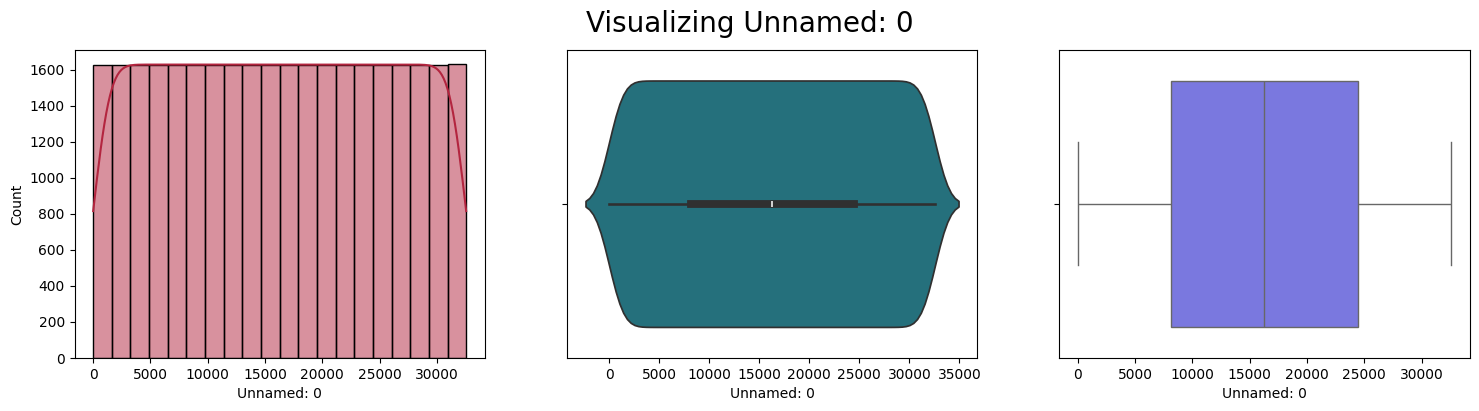

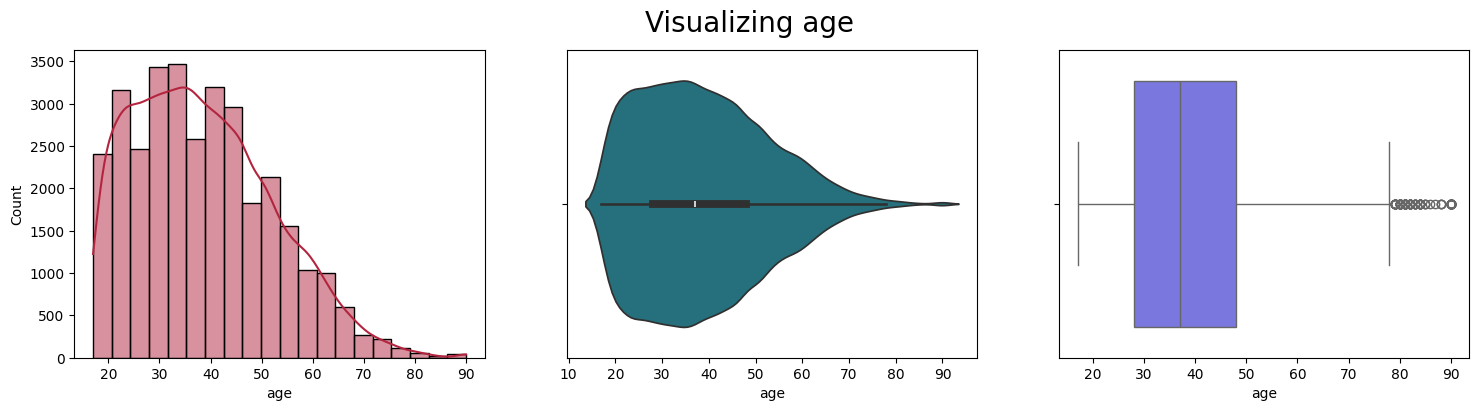

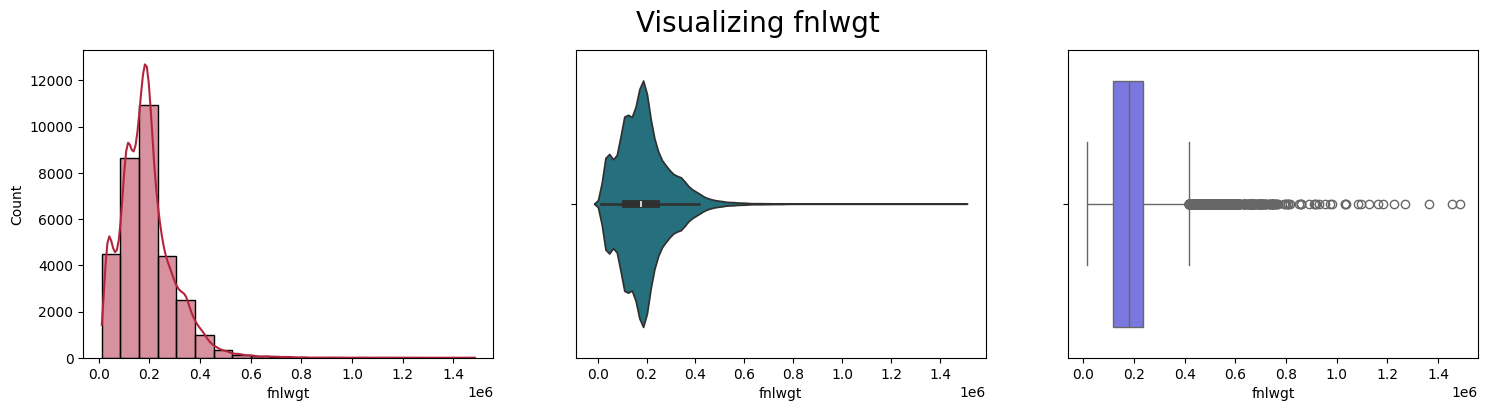

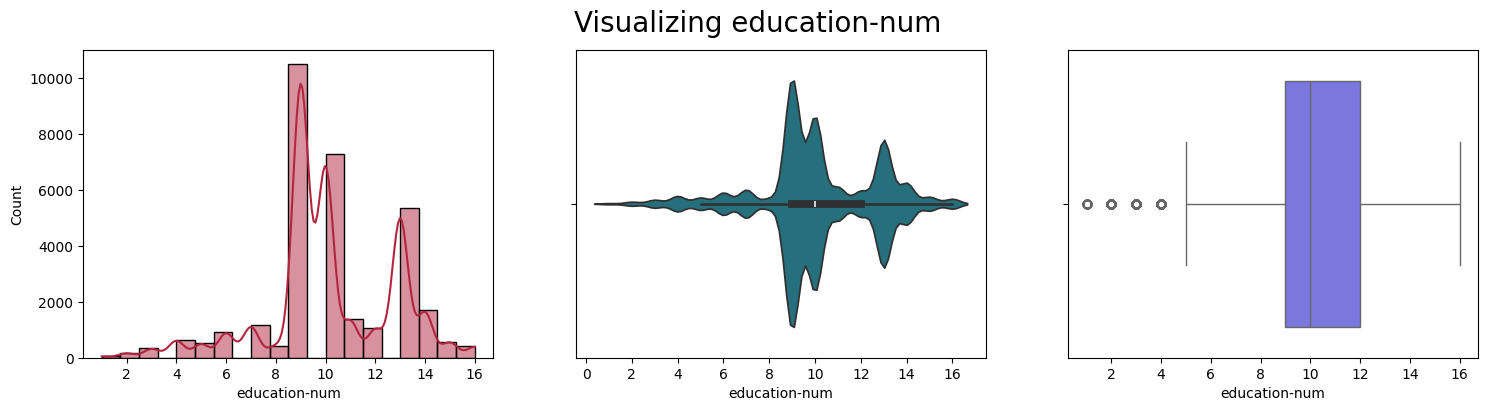

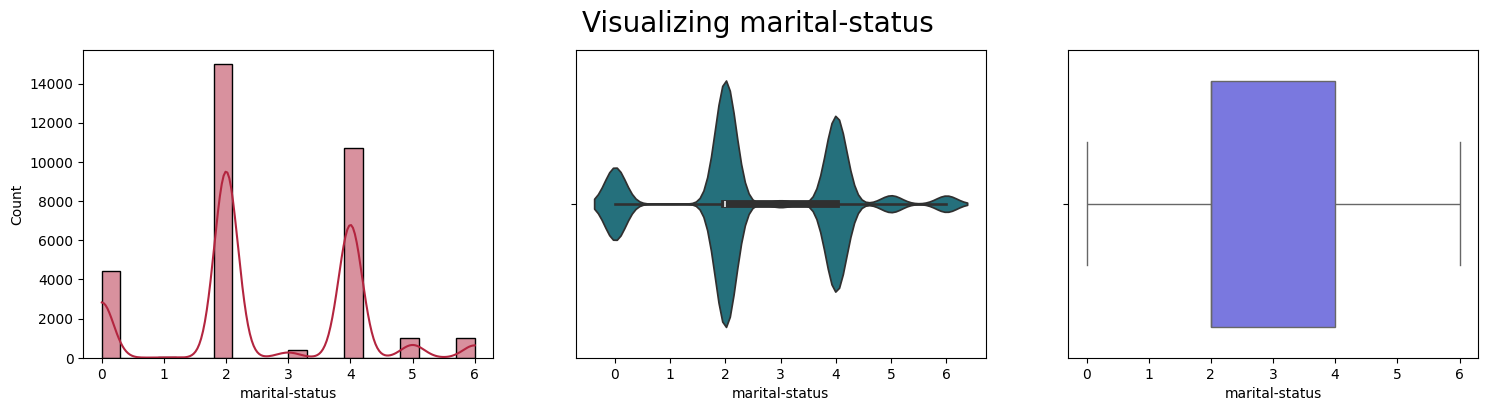

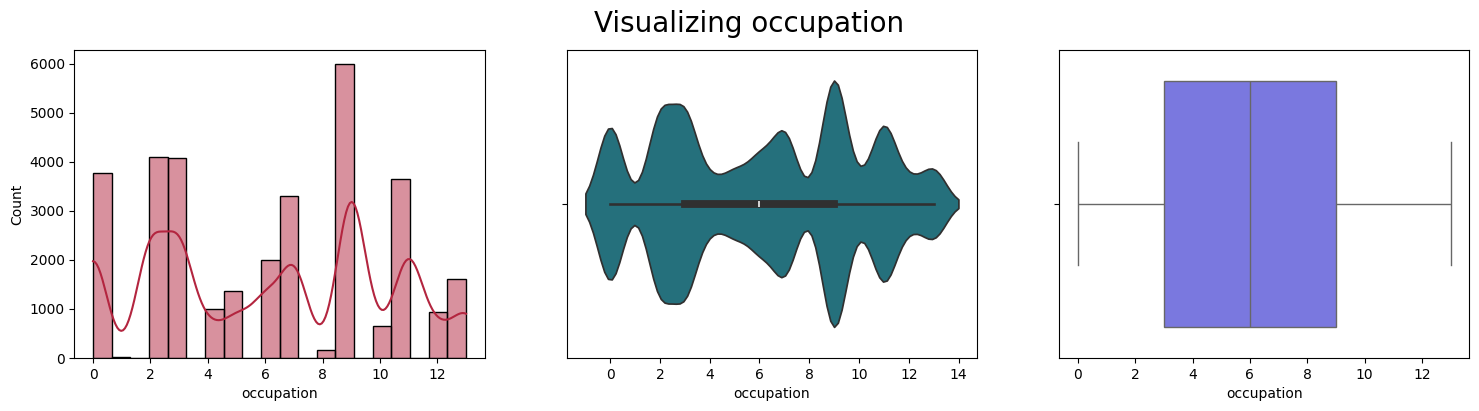

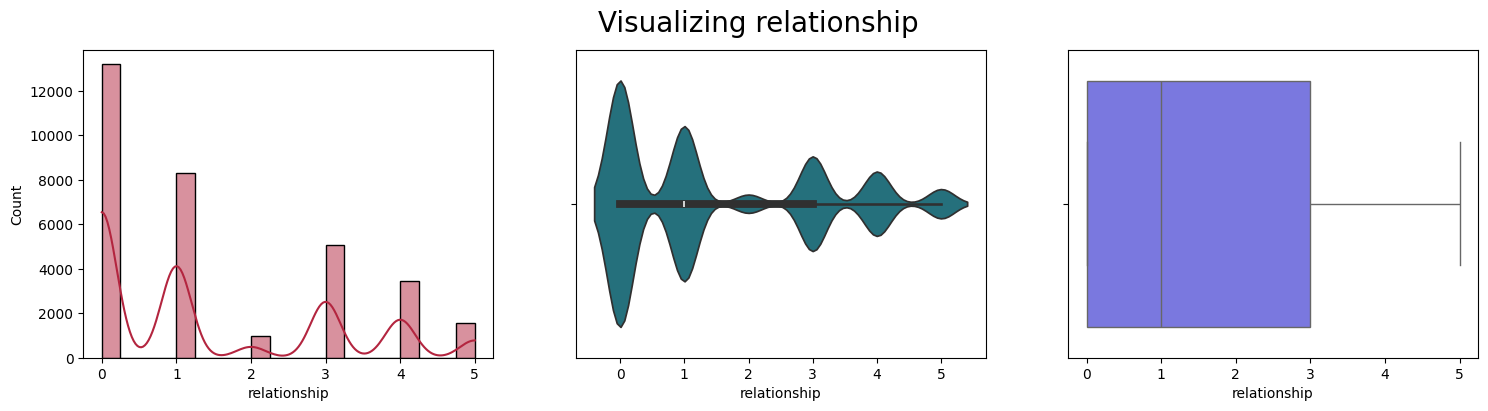

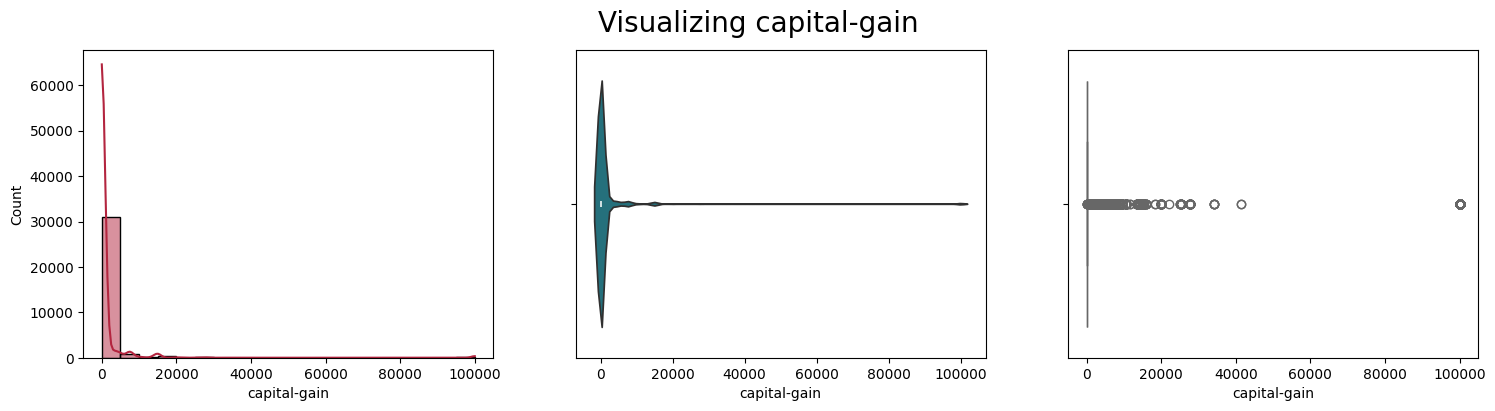

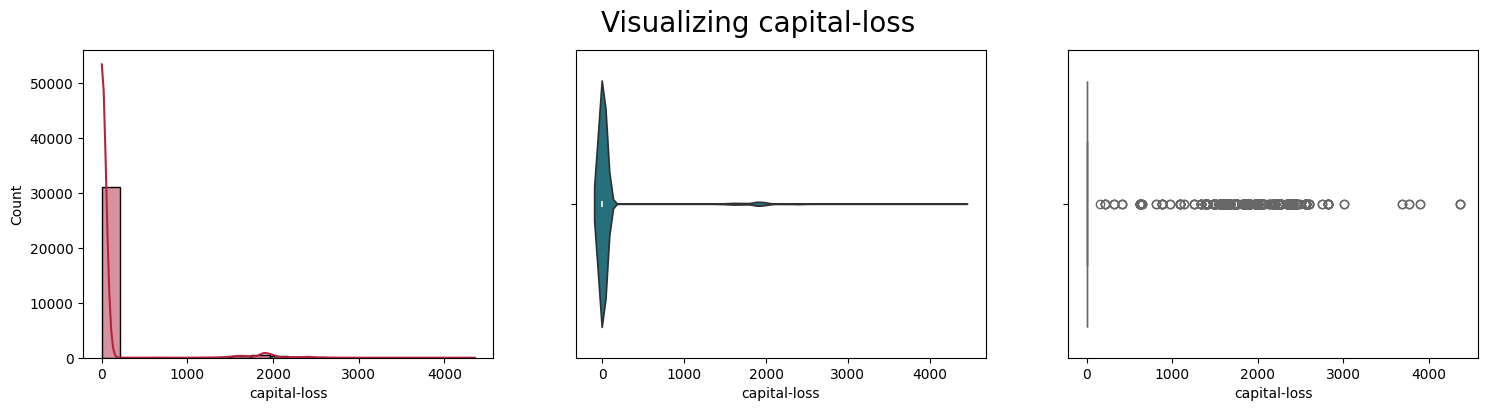

In [57]:
df1=df_adult.drop(["workclass","country","race","sex","salary","hours-per-week"],axis=1)
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

Age & Fnlwgt are left skewed data

Fnlwgt, Education-num, Capital-gain and  Capital-loss have outliers

## 2. Model Development & Classification

### 2.1 Data Preparation

In [69]:
df_adult.columns = df_adult.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)


In [70]:
X= df_adult.drop(['salary'],axis=1)
y=df_adult['salary']

In [71]:
print(y.value_counts(normalize=False))

salary
0    24720
1     7841
Name: count, dtype: int64


We need to do sampling to remove bias in training model.

In [72]:
rs = RandomOverSampler(random_state=30)
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [73]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

salary
0    0.5
1    0.5
Name: proportion, dtype: float64

### 2.2 Training the dataset

In [74]:
split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [75]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (27686, 14)(27686,)
Validation dataset: (6922, 14)(6922,)
Test dataset: (14832, 14)(14832,)


In [76]:
y_train

16361    0
14504    0
36510    1
31752    1
12493    1
        ..
42832    1
48920    1
44862    1
21224    1
22388    1
Name: salary, Length: 27686, dtype: int32

### 2.3 Model Development

#### 2.3.1 Initiating model

In [77]:
models = []
names = ['Random Forest','GaussianNB','DecisionTreeClassifier','Adaboost','Xgboost','LGBM']

models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((AdaBoostClassifier()))
models.append((xgb.XGBClassifier()))
models.append((ltb.LGBMClassifier()))

In [78]:
for i in range(len(models)):
    print(names[i])
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_val)
    print("Accuracy score of ", names[i], "=", accuracy_score(y_val, y_pred))

Random Forest
Accuracy score of  Random Forest = 0.9107194452470384
GaussianNB
Accuracy score of  GaussianNB = 0.624963883270731
DecisionTreeClassifier
Accuracy score of  DecisionTreeClassifier = 0.8829817971684484
Adaboost
Accuracy score of  Adaboost = 0.8217278243282289
Xgboost
Accuracy score of  Xgboost = 0.8662236347876336
LGBM
[LightGBM] [Info] Number of positive: 13807, number of negative: 13879
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 27686, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498700 -> initscore=-0.005201
[LightGBM] [Info] Start training from score -0.005201
Accuracy score of  LGBM = 0.8503322739092748


#### 2.3.2 Cross validating  and choosing best fit 

In [79]:


# Assuming X_train, X_val, y_train, y_val are already defined

kfold = KFold(n_splits=5)

for i in range(len(models)):
    model = models[i]
    name = names[i]
    
    # Perform cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f'Cross-validation results for {name}: {cv_results}')
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation data
    predictions = model.predict(X_val)
    
    
    # Calculate the accuracy score
    acc_score = accuracy_score(y_val, predictions)
    
    print('-' * 40)
    print(f'{name}: {acc_score}')


Cross-validation results for Random Forest: [0.89346334 0.89922341 0.89633375 0.90662814 0.88856782]
----------------------------------------
Random Forest: 0.9120196475007223
Cross-validation results for GaussianNB: [0.62874684 0.63518151 0.6294022  0.62633195 0.63734874]
----------------------------------------
GaussianNB: 0.624963883270731
Cross-validation results for DecisionTreeClassifier: [0.86421091 0.87430016 0.86057432 0.87809283 0.86454759]
----------------------------------------
DecisionTreeClassifier: 0.8861600693441202
Cross-validation results for Adaboost: [0.82195739 0.82300885 0.8258985  0.83655409 0.81524291]
----------------------------------------
Adaboost: 0.8217278243282289
Cross-validation results for Xgboost: [0.85807151 0.86057432 0.86545061 0.86924327 0.85497562]
----------------------------------------
Xgboost: 0.8662236347876336
[LightGBM] [Info] Number of positive: 11045, number of negative: 11103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, th

Random Forest Classifier gets selected as it has the maximum accuracy score.

#### Testing the dataset

In [82]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.910059331175836
----------------------------------------
Confusion Matrix:
[[6406  973]
 [ 361 7092]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7379
           1       0.88      0.95      0.91      7453

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



## Summary

##### We have a model with 91% accuracy score.
##### We did not handled outliers or normalised data because random forest models do not get affected with these factors.